In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse

In [2]:
np.set_printoptions(suppress=True)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len

Start finding chessboard corners of depth image...
find the chessboard corners of chessboard/02.png


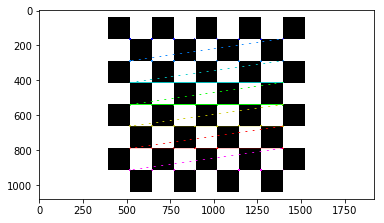

In [4]:
# Arrays to store object points and image points from all the images.
# objpoints = [] # 3d points in real world space
# projected_imgpoints = [] # 2d points in image plane.
chessboard_img_corners = []

img_size = (10, 10)

# Make a list of calibration images
images = glob.glob('chessboard/02.png')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of depth image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, chessboard_img_corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

    # If found, add object points, image points
    if ret == True:
#         projected_imgpoints.append(chessboard_img_corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), chessboard_img_corners, ret)
        plt.imshow(img)
        


In [5]:
RGB_mtx = np.mat([[964.30607758,   0.,         654.65974554  ],
 [  0.,         954.28084927, 376.62098321],
 [  0.,           0.,           1.        ]])

RGB_dist =  np.mat([[ 3.88969141e-01, -3.47643131e+00, -1.67509338e-02,  9.51395905e-03,
   1.08123514e+01]])

find the chessboard corners of printed_chessboard\2020-02-05_16-54-30.jpg
[[ 6.62190622]
 [11.18594014]
 [47.30269196]]

[[ 0.43097296]
 [-0.52012436]
 [-3.04312709]]


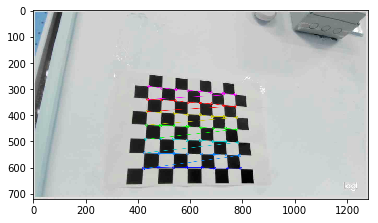

In [6]:
# Calculate the extrinsic parameters using the printed chessboard with the help of the calibrated camera.
# RGBobjpoints = []
# RGBimgpoints = [] # 2d points in image plane.

images = glob.glob('printed_chessboard/*.jpg')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, printed_corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

    # If found, add object points, image points
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), printed_corners, ret)
        plt.imshow(img)
        
        retval, rvec, tvec = cv2.solvePnP(objp, printed_corners, RGB_mtx, RGB_dist)
        print(tvec)
        print()
        print(rvec)
        #tvec rvec store into list

In [7]:
from numpy.linalg import inv
def calculate_XYZ(u,v, rotationMatrix, translationVector, cameraMatrix):
    #https://github.com/rodolfoap/OpenCV-2Dto3D/blob/master/transform.cpp                                  
    #Solve: From Image Pixels, find World Points
    Z = 0;
    rotationMatrix,_ = cv2.Rodrigues(rotationMatrix)
    
    uv_1 = np.array([[u,v,1]], dtype=np.float32)
    uv_1 = uv_1.T
    
    invM_x_uv1 = np.matmul(inv(cameraMatrix),uv_1)
    invR_x_invM_x_uv1 = np.matmul(inv(rotationMatrix), invM_x_uv1)
    invR_x_tvec = np.matmul(inv(rotationMatrix), translationVector)
    
    s = (Z + invR_x_tvec[2]) / invR_x_invM_x_uv1[2]
#     print(s,invR_x_invM_x_uv1,invR_x_tvec)
    wcPoint =  s[0,0] * invR_x_invM_x_uv1 - invR_x_tvec

#     print(wcPoint)

    return np.float32(wcPoint.T[0])

In [8]:
# print(projected_corners)
p = calculate_XYZ(printed_corners[0,0,0],printed_corners[0,0,1], rvec, tvec, RGB_mtx)
print(p)
# print(objp)

[[-0.24426274 -0.06859205  0.        ]]


find the chessboard corners of projected_chessboard\2020-02-05_16-53-35.jpg
[[ 3.5625863  -0.24612363  0.        ]
 [ 5.9571953  -0.42850453  0.        ]
 [ 8.313115   -0.36435437  0.        ]
 [10.659966   -0.4892474   0.        ]
 [12.901518   -0.5359308   0.        ]
 [15.1102705  -0.6223371   0.        ]
 [17.279068   -0.69532186  0.        ]
 [19.37627    -0.8111708   0.        ]
 [ 3.4063134   2.12698     0.        ]
 [ 5.84557     1.9946344   0.        ]
 [ 8.22726     1.9646262   0.        ]
 [10.5363655   1.835757    0.        ]
 [12.829967    1.7588863   0.        ]
 [15.086517    1.5916718   0.        ]
 [17.279177    1.5738251  -0.        ]
 [19.475735    1.4723256   0.        ]
 [ 3.2374983   4.4994636   0.        ]
 [ 5.7124004   4.352891    0.        ]
 [ 8.089385    4.3949776   0.        ]
 [10.499269    4.205992    0.        ]
 [12.778062    4.1443434   0.        ]
 [15.120437    3.9074194   0.        ]
 [17.336039    3.7592876   0.        ]
 [19.472929    3.664638    

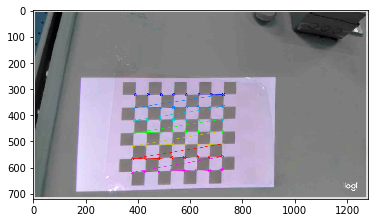

In [9]:
#Calculate the corners of the projected chessboard 
#with the help of the extrinsic and intrinsic parameters of the camera 
#and store in the ‘object points’ matrix.
projected_objpoints = []
projected_imgpoints = []
camera_imgpoints = [] 

# RGB_projected_imgpoints = [] # 2d points in image plane.

projected_obj = np.zeros((56,3), dtype=np.float32)

imgs = glob.glob('projected_chessboard/*.jpg')
for idx, fname in enumerate(imgs):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    #projected_corners in RGB image space
    ret, projected_corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

    # If found, add object points, image points
    if ret == True:
        #projected points in RGB image space to would coord
        for i in range(56):
            #對應點找反==>反過來放 55-i 
            projected_obj[55-i,:] = calculate_XYZ(projected_corners[i,0,0], projected_corners[i,0,1], rvec, tvec, RGB_mtx)
            

        projected_objpoints.append(projected_obj)
        projected_imgpoints.append(chessboard_img_corners)
        camera_imgpoints.append(projected_corners)
        print(projected_obj)
#         print(objp)
#         print(projected_corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), projected_corners, ret)
        plt.imshow(img)



In [10]:
print(len(projected_objpoints), len(projected_imgpoints))
print(img_size)
print(projected_objpoints[0].shape, projected_imgpoints[0].shape)
print(projected_objpoints[0].dtype, objp.dtype)
ret, projector_mtx, projector_dist, projector_rvecs, projector_tvecs = cv2.calibrateCamera(projected_objpoints, projected_imgpoints, img_size,None,None)
projector_Vr = np.array(projector_rvecs)
projector_Tr = np.array(projector_tvecs)
projector_extrinsics = np.concatenate((projector_Vr, projector_Tr), axis=1).reshape(-1,6)
print(projector_mtx)
print(projector_dist)
print()
print(projector_extrinsics)
print(projector_Tr)

1 1
(1280, 720)
(56, 3) (56, 1, 2)
float32 float32
[[2306.99474206    0.          970.12023468]
 [   0.         2338.47873751  301.5683603 ]
 [   0.            0.            1.        ]]
[[  0.58450434 -11.66211777   0.04147746  -0.02141187  58.12217581]]

[[  0.29930009   0.22723529   0.00818322 -11.64231535  -2.42008422
   43.50525124]]
[[[-11.64231535]
  [ -2.42008422]
  [ 43.50525124]]]


In [14]:
print('=== Result ===')
ret, depth_cam_int, depth_cam_dist, RGB_cam_int, RGB_cam_dist, depth_rgb_rmat, depth_rgb_tvec, E, F = cv2.stereoCalibrate(
    projected_objpoints, camera_imgpoints, projected_imgpoints, RGB_mtx, RGB_dist, projector_mtx, projector_dist, None)

print('  RMS :', ret)
print('  RGB Camera intrinsic parameters :')
print(depth_cam_int, '    ')
print('  RGB Camera distortion parameters :')
print(depth_cam_dist, '    ')
print()
print('  Projector intrinsic parameters :')
print(RGB_cam_int, '    ')
print('  Projector distortion parameters :')
print(RGB_cam_dist, '    ')
print()
print('  Rotation matrix / translation vector from RGB camera to Projector')
print('  (they translate points from RGB camera coord to Projector coord) :')
print(depth_rgb_rmat, '    ')
print(depth_rgb_tvec, '    ')
print()

=== Result ===
  RMS : 2.119869037979259
  RGB Camera intrinsic parameters :
[[964.30607758   0.         654.65974554]
 [  0.         954.28084927 376.62098321]
 [  0.           0.           1.        ]]     
  RGB Camera distortion parameters :
[[ 0.38896914 -3.47643131 -0.01675093  0.00951396 10.8123514 ]]     

  Projector intrinsic parameters :
[[2306.99474206    0.          970.12023468]
 [   0.         2338.47873751  301.5683603 ]
 [   0.            0.            1.        ]]     
  Projector distortion parameters :
[[  0.58450434 -11.66211777   0.04147746  -0.02141187  58.12217581]]     

  Rotation matrix / translation vector from RGB camera to Projector
  (they translate points from RGB camera coord to Projector coord) :
[[ 0.98924002  0.03191501  0.14277823]
 [-0.00804824  0.98630985 -0.16470612]
 [-0.14608017  0.16178477  0.97595403]]     
[[-2.3446949 ]
 [ 7.62126398]
 [-3.95575746]]     

